# Seaborn - CatPlot, CountPlot

막대 그래프 중에서 빈도 그래프 그리는 기능에 최적화 된 `catplot()` 메서드와 `countplot()` 메서드의 사용방법 확인

## #01. 준비작업

### [1] 패키치 참조

In [1]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

#### 타이타닉 탑승객 데이터

> 출처: https://www.kaggle.com/competitions/titanic

| 변수명 | 설명 |
|---|---|
| PassengerId | 탑승객의 ID(인덱스와 같은 개념) |
| Survived | 생존유무(0은 사망 1은 생존) |
| Pclass | 객실의 등급 |
| Name | 이름 |
| Sex |성별 |
| SibSp | 동승한 형제 혹은 배우자의 수 |
| Parch | 동승한 자녀 혹은 부모의 수 |
| Ticket | 티켓번호 |
| Fare | 요금 |
| Cabin | 선실 |
| Embarked | 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [3]:
origin = read_excel('https://data.hossam.kr/pydata/titanic.xlsx', index_col='PassengerId')
origin.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### [4] 데이터 전처리

#### (1) 범주형 데이터 처리

##### 각 요인별 데이터 타입 확인

In [4]:
origin.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

##### 범주형 데이터 타입 변환

In [5]:
df = origin.astype({"Survived": "category", "Pclass": "category", "Sex": "category",
                     "Cabin": "category", "Embarked": "category"})
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

## #02. CatPlot (빈도 막대 그래프)

`catplot()`은 기본적으로 범주형 변수에 대한 그래프를 그리는 데 사용되지만, 다양한 플롯 유형을 지원한다.

### [1] 기본 사용 방법

`x`축으로 집단을 구분할 수 있는 범주형 변수를 설정하고 `kind='count'` 파라미터를 설정한다.

`catplot()` 함수의 결과물은 그래프의 크기가 `rcParams` 속성의 영향을 받지 않는다.

크기 설정을 위해서는 `catplot()` 메서드로부터 객체를 리턴받아 사이즈 설정을 개별적으로 수행해야 한다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25388\2044813609.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sb.catplot(data=df,


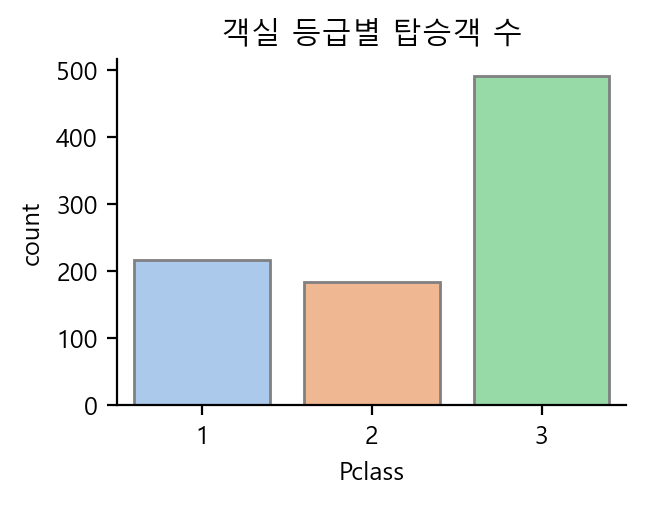

In [6]:
g = sb.catplot(data=df,
            x='Pclass',       # 집단을 구분하는 기준
            kind="count",     # 그래프 종류
            palette='pastel', # 색상표 지정
            edgecolor='0.5'   # 막대 테두리 색상 투명도 지정(0=불투명 ~ 1=투명, ex: 0.5=반투명)
        )

g.fig.set_figwidth(3)
g.fig.set_figheight(2)

plt.title("객실 등급별 탑승객 수")
plt.show()
plt.close()

### [2] 범례 기준 추가

각 막대를 구분할 수 있는 범주형 변수를 `hue` 파라미터로 추가

`kind` : 그래프의 종류는 범주형 축 수준 플로팅 함수의 이름 (그래프 형태에 관여)

- "strip", "swarm", "box", "violin", "boxen", "point", "bar" 또는 "count"

#### 객실 등급에 따른 성별 빈도

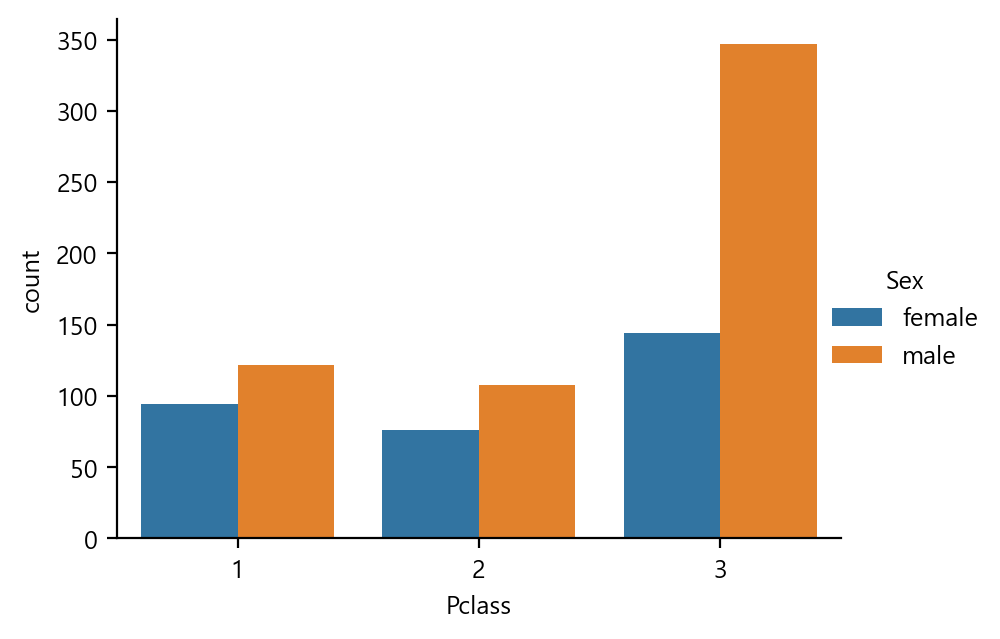

In [7]:
g = sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Sex'
        )

g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.show()
plt.close()

### [3] 병렬 빈도 막대 그래프

이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 두 개로 분리

병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프

Seaborn으로 병렬 빈도 막대그래프를 그리려면 `catplot()` 메서드에 `kind='count'` 와 `col` 옵션을 추가한다.

#### 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리

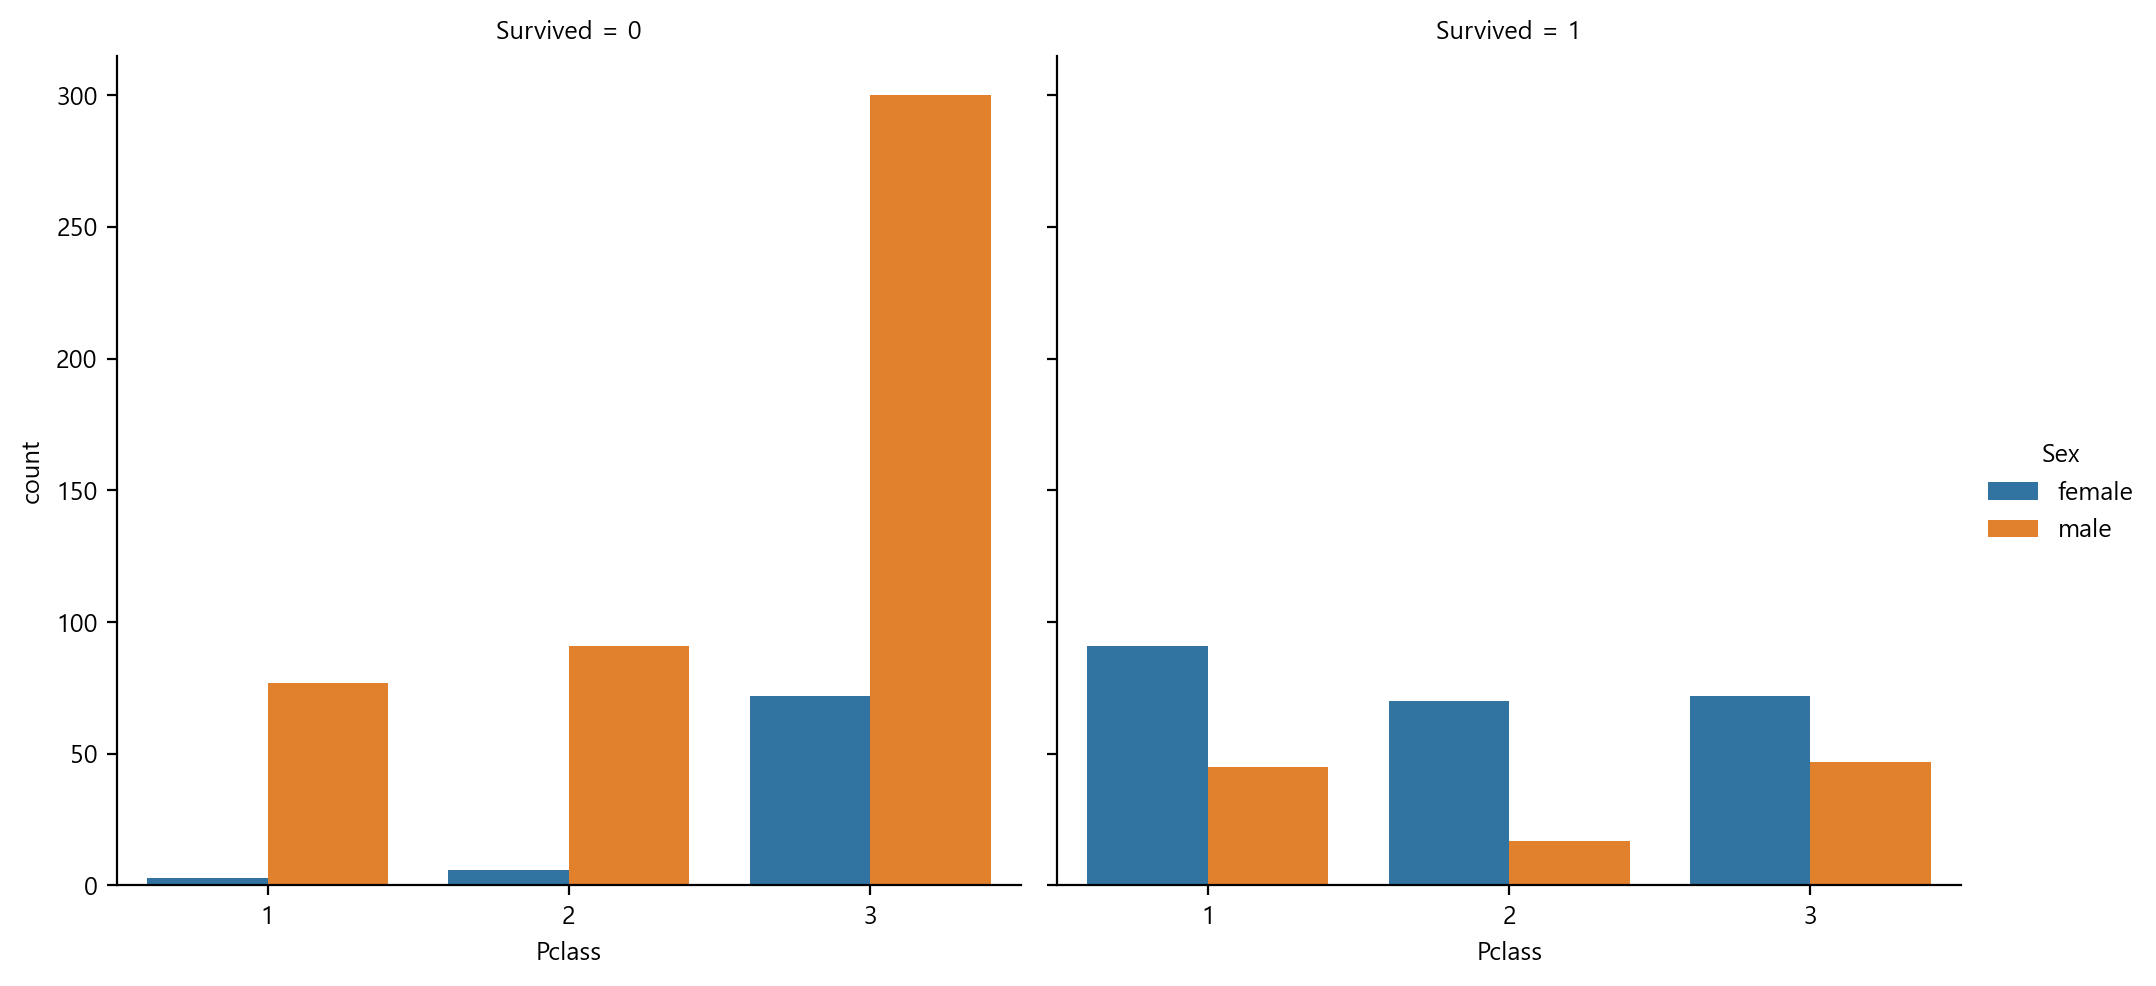

In [8]:
sb.catplot(data=df,
            x='Pclass',
            hue='Sex',       # 데이터 범주 설정
            col='Survived',  # 캔버스 분리하기
            kind='count'     # 빈도 막대그래프 그리기
        )

plt.show()
plt.close()

### [4] 가로 빈도 막대 그래프

`x` 파라미터 대신 `y` 파라미터를 사용한다.

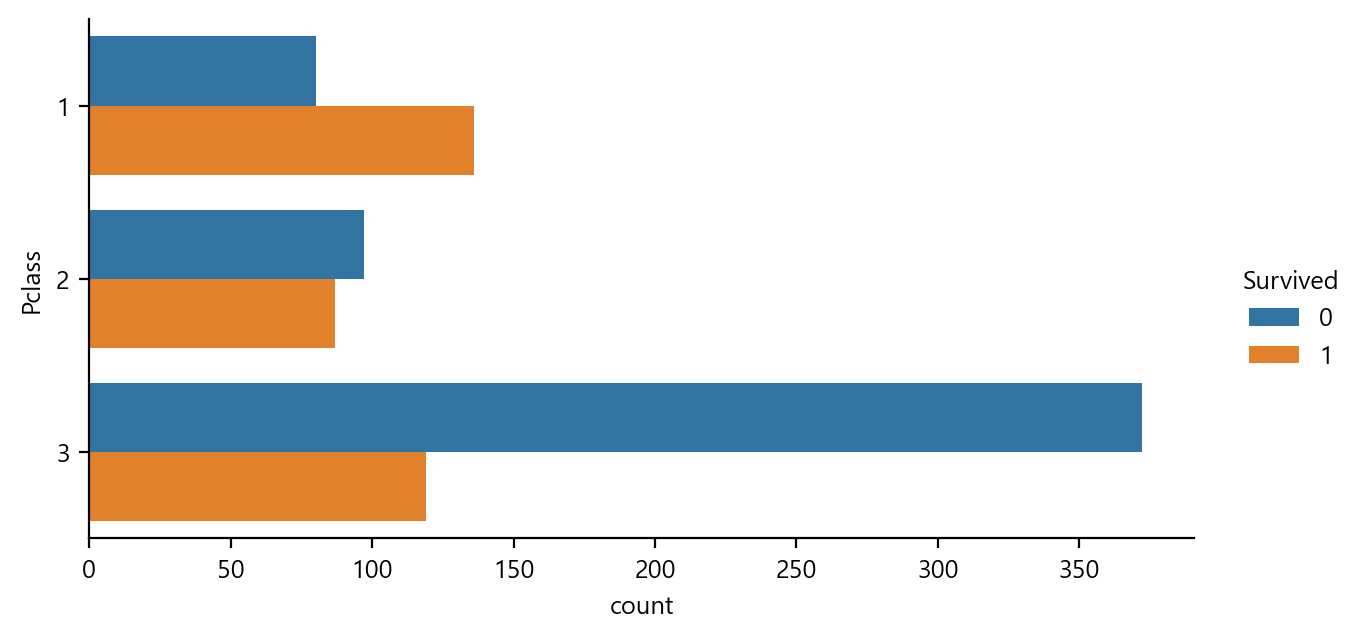

In [9]:
g = sb.catplot(data=df,
            y='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Survived'
        )

g.fig.set_figwidth(7)
g.fig.set_figheight(3)

plt.show()
plt.close()

## #03. CountPlot

데이터의 빈도를 표현하는 가장 간편한 방법

`catplot()`에서 `kind`값이 `count`로 고정되어 있는 형태

### [1] 기본 사용 방법

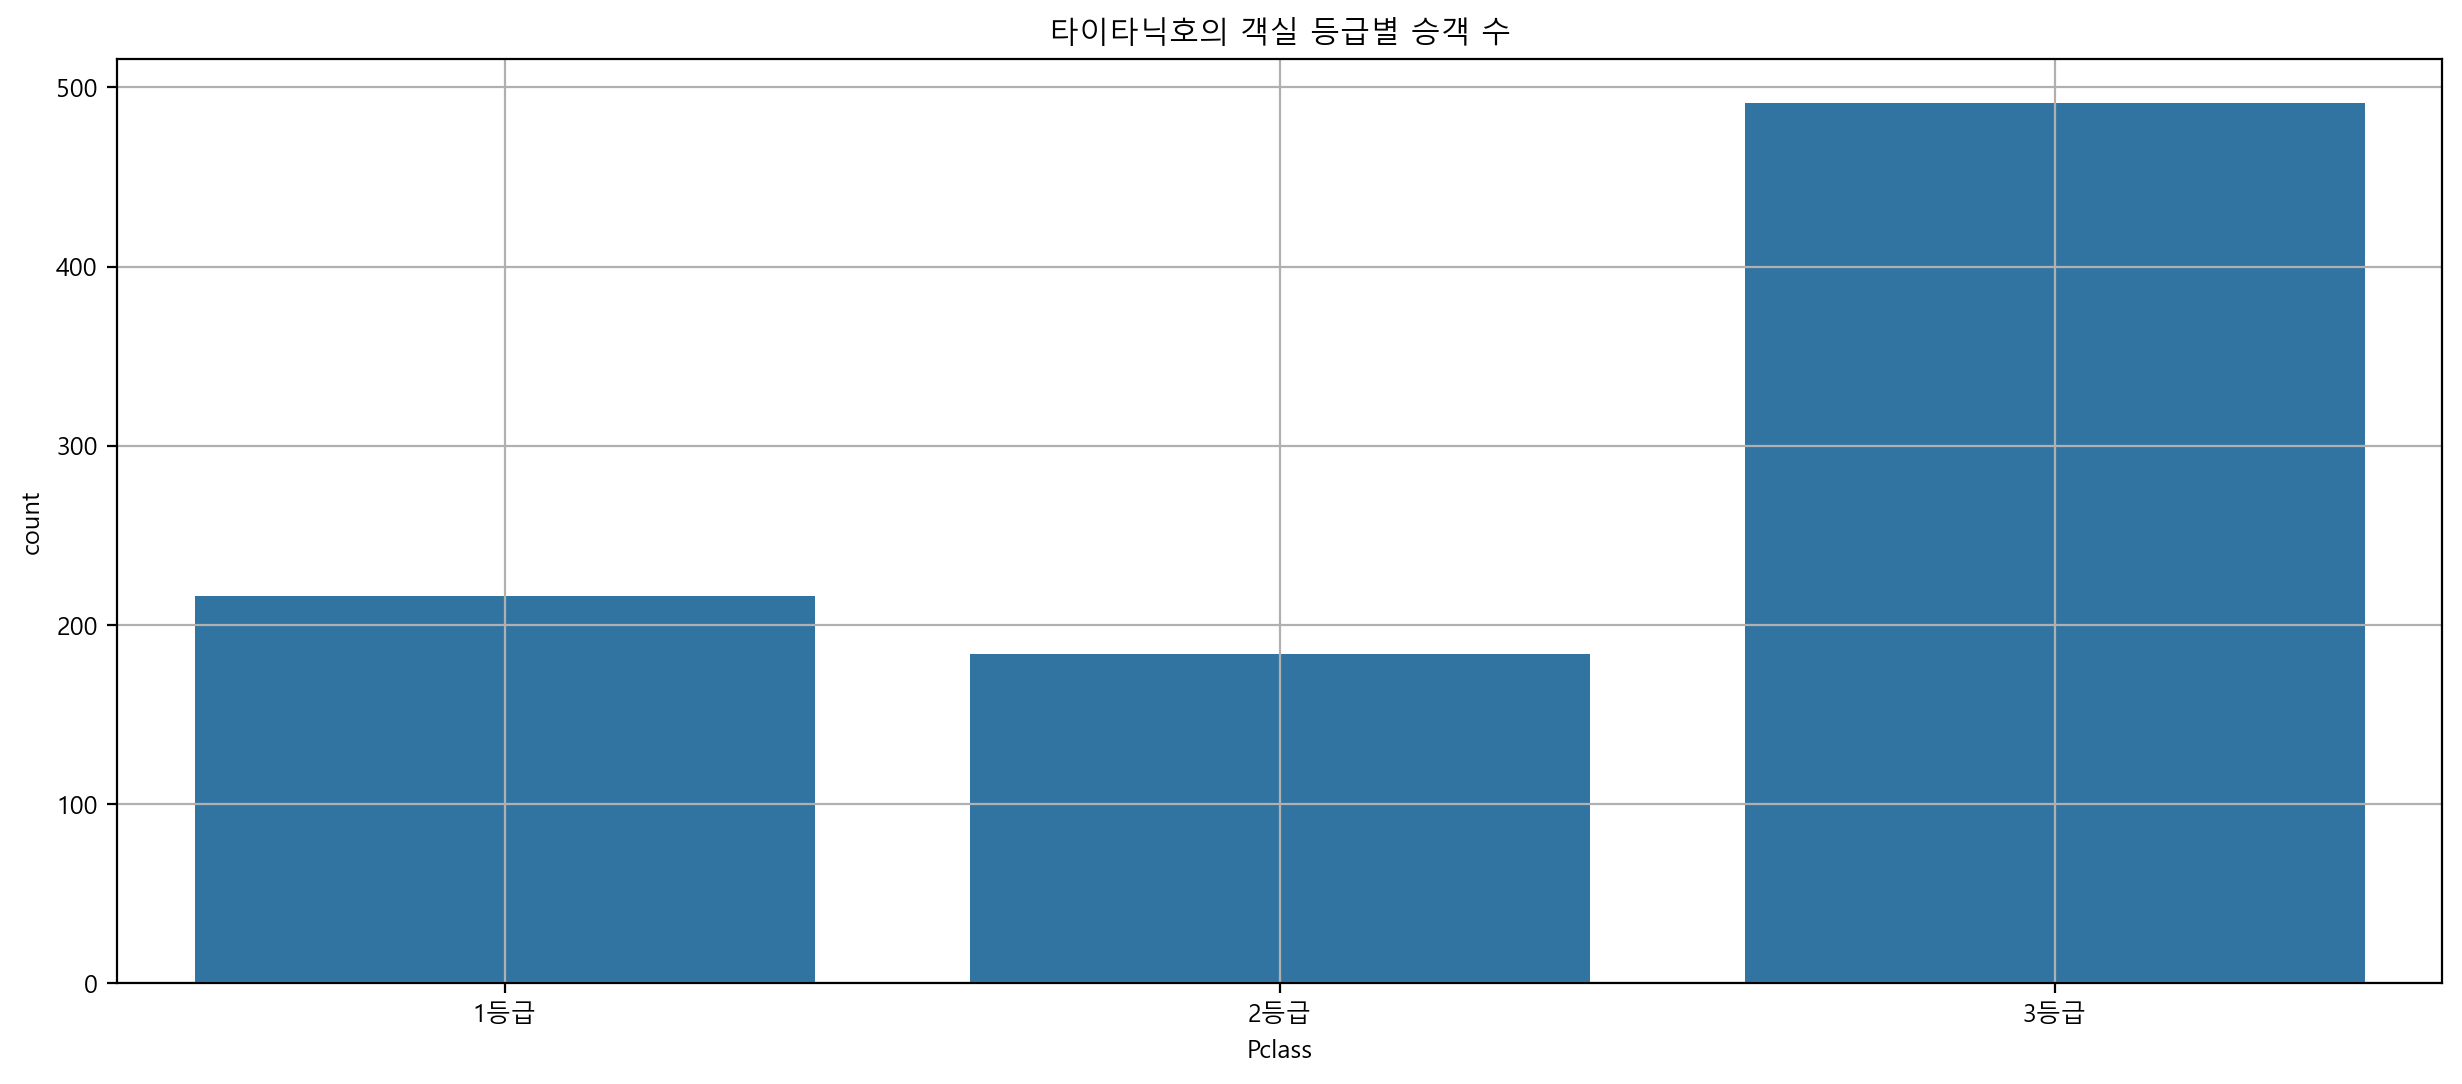

In [10]:
plt.figure()
sb.countplot(data=df, x="Pclass")
plt.title("타이타닉호의 객실 등급별 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

### [2] 범주 추가

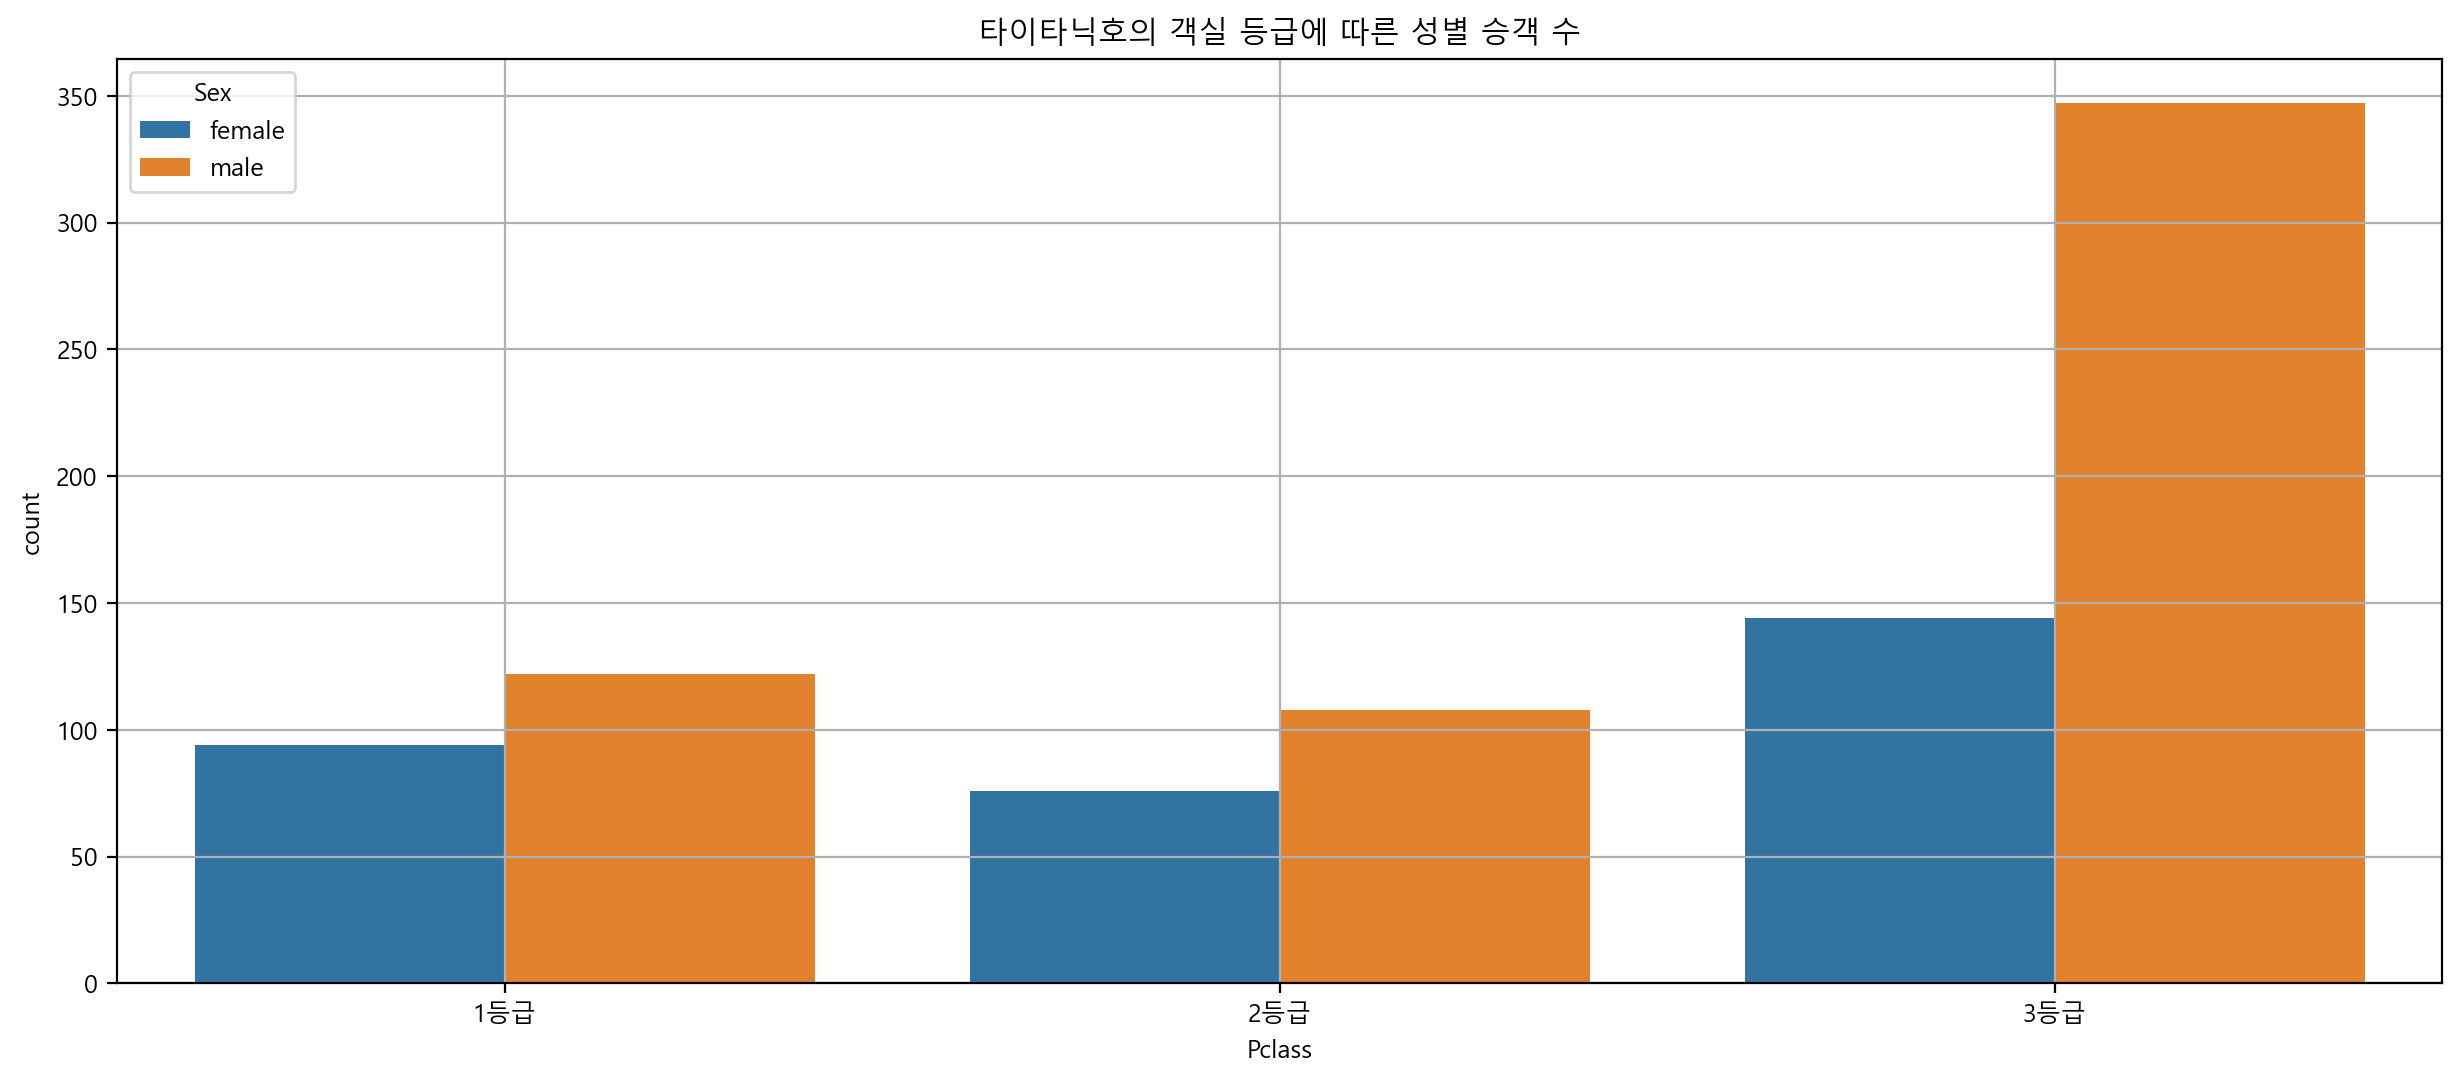

In [11]:
plt.figure()
sb.countplot(data=df, x="Pclass", hue='Sex')
plt.title("타이타닉호의 객실 등급에 따른 성별 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()